In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./heart.csv", index_col='output')
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  \
output                                                                      
1        63    1   3     145   233    1        0       150     0      2.3   
1        37    1   2     130   250    0        1       187     0      3.5   
1        41    0   1     130   204    0        0       172     0      1.4   
1        56    1   1     120   236    0        1       178     0      0.8   
1        57    0   0     120   354    0        1       163     1      0.6   
...     ...  ...  ..     ...   ...  ...      ...       ...   ...      ...   
0        57    0   0     140   241    0        1       123     1      0.2   
0        45    1   3     110   264    0        1       132     0      1.2   
0        68    1   0     144   193    1        1       141     0      3.4   
0        57    1   0     130   131    0        1       115     1      1.2   
0        57    0   1     130   236    0        0       174     0      0.0   

        slp  caa  thall  
output                   
1         0    0      1  
1         0    0      2  
1         2    0      2  
1         2    0      2  
1         2    0      2  
...     ...  ...    ...  
0         1    0      3  
0         1    0      3  
0         1    2      3  
0         1    1      3  
0         1    1      2  

[303 rows x 13 columns]

In [3]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall  
count  303.000000  
mean     2.313531  
std      0.612277  
min      0.000000  
25%      2.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

Aucune valeur n'est incohérente ou bien de non-sens d'après le min, Max et la moyenne en comparatif avec la légende de chaque propriété

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
dtype: object

Toutes nos colonnes sont au format numérique, aucune transformation n'est à envisager.

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64

Aucune colonne ne possède de valeur ou non renseigné 

CLUSTER


<AxesSubplot:>

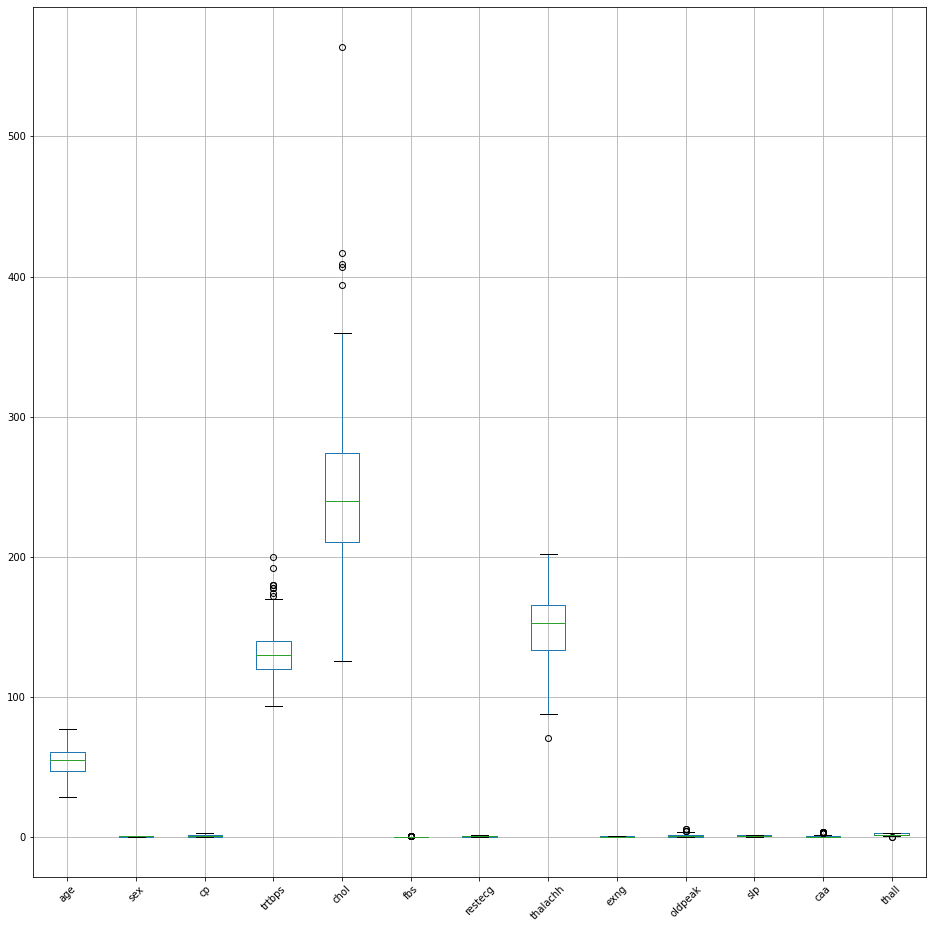

In [7]:
df.boxplot(rot=45, figsize=(16,16))

On va ramener toutes les données à l'échelle.

In [8]:
corr = df.corr()
corr

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   

           restecg  thalachh      exng   oldpeak       slp       caa     thall  
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326  0.068001  
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261  0.210041  
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053 -0.161736  
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389  0.062210  
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511  0.098803  
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979 -0.032019  
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042 -0.011981  
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177 -0.096439  
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739  0.206754  
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682  0.210244  
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155 -0.104764  
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000  0.151832  
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832  1.000000

La matrice corrélation est symétrique.

In [9]:
# HeatMap : 
# https://stackoverflow.com/questions/39409866/correlation-heatmap

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/tmp/ipykernel_153714/2553450484.py:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


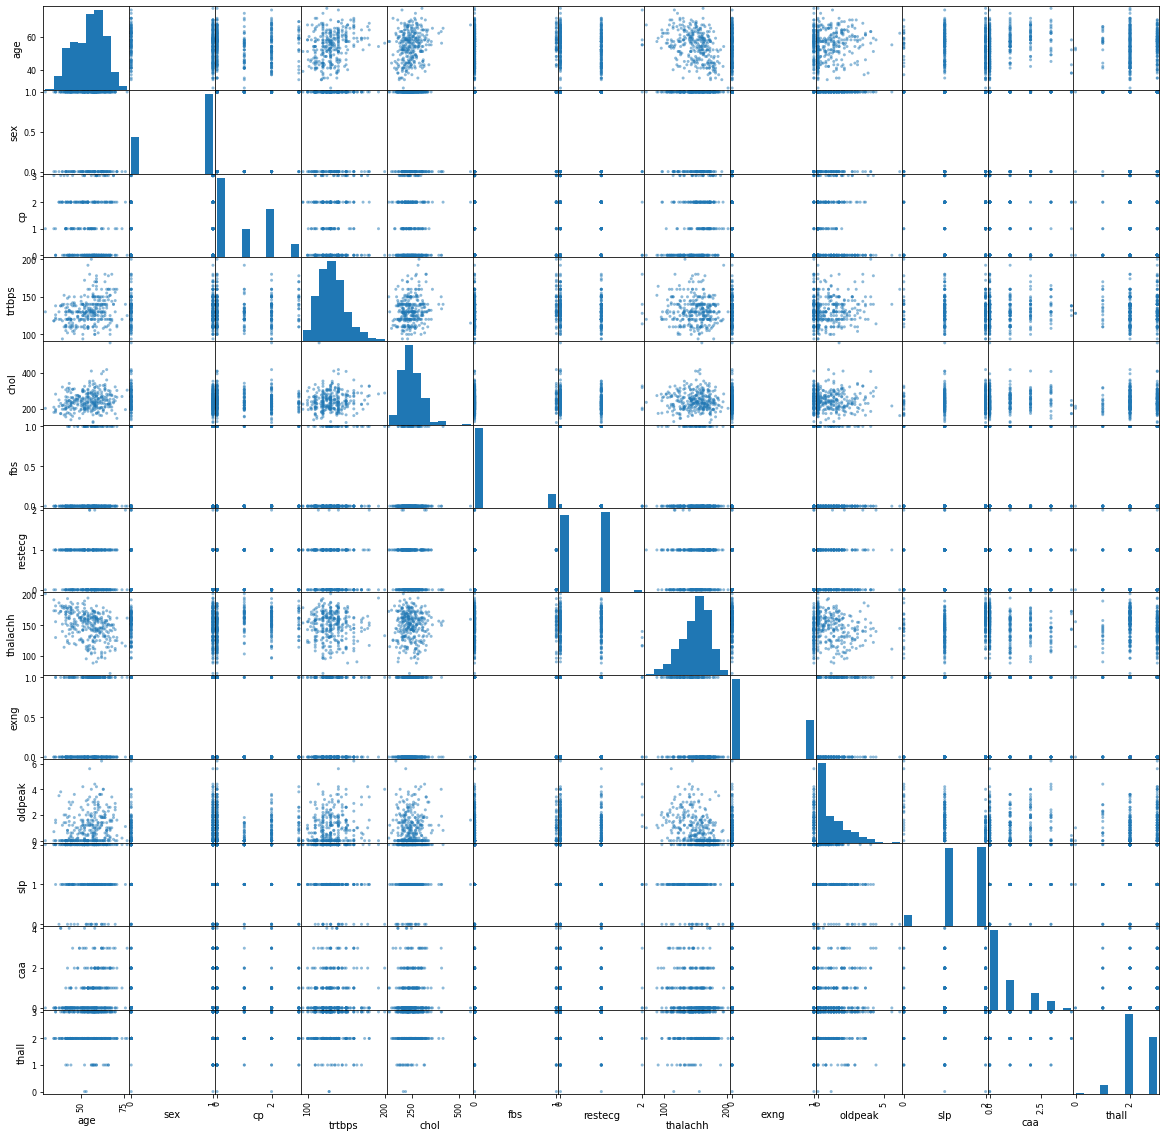

In [10]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(df, figsize = (20,20))


C'est illisible pour définir un nombre de clusters . Or n'autre target est la colonne "output" ayant en sortie 0 ou 1. Notre nombre de clusters sera de 2.

In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(df)
df_minmax


array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [12]:
df_minmax = pd.DataFrame(df_minmax, columns=df.columns, index=df.index)
df_minmax


age  sex        cp    trtbps      chol  fbs  restecg  thalachh  \
output                                                                        
1       0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1       0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
1       0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
1       0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
1       0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
...          ...  ...       ...       ...       ...  ...      ...       ...   
0       0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
0       0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
0       0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
0       0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
0       0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   

        exng   oldpeak  slp   caa     thall  
output                                       
1        0.0  0.370968  0.0  0.00  0.333333  
1        0.0  0.564516  0.0  0.00  0.666667  
1        0.0  0.225806  1.0  0.00  0.666667  
1        0.0  0.129032  1.0  0.00  0.666667  
1        1.0  0.096774  1.0  0.00  0.666667  
...      ...       ...  ...   ...       ...  
0        1.0  0.032258  0.5  0.00  1.000000  
0        0.0  0.193548  0.5  0.00  1.000000  
0        0.0  0.548387  0.5  0.50  1.000000  
0        1.0  0.193548  0.5  0.25  1.000000  
0        0.0  0.000000  0.5  0.25  0.666667  

[303 rows x 13 columns]

On s'aperçoit que la donnée a été redressée car les valeurs sont comprises entre 0 et 1.

In [13]:
df_minmax.describe()


age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528465    0.683168    0.322332    0.354941    0.274575    0.148515   
std      0.189210    0.466011    0.344017    0.165454    0.118335    0.356198   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.385417    0.000000    0.000000    0.245283    0.194064    0.000000   
50%      0.541667    1.000000    0.333333    0.339623    0.260274    0.000000   
75%      0.666667    1.000000    0.666667    0.433962    0.339041    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.264026    0.600358    0.326733    0.167678    0.699670    0.182343   
std      0.262930    0.174849    0.469794    0.187270    0.308113    0.255652   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.477099    0.000000    0.000000    0.500000    0.000000   
50%      0.500000    0.625954    0.000000    0.129032    0.500000    0.000000   
75%      0.500000    0.725191    1.000000    0.258065    1.000000    0.250000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            thall  
count  303.000000  
mean     0.771177  
std      0.204092  
min      0.000000  
25%      0.666667  
50%      0.666667  
75%      1.000000  
max      1.000000

<AxesSubplot:>

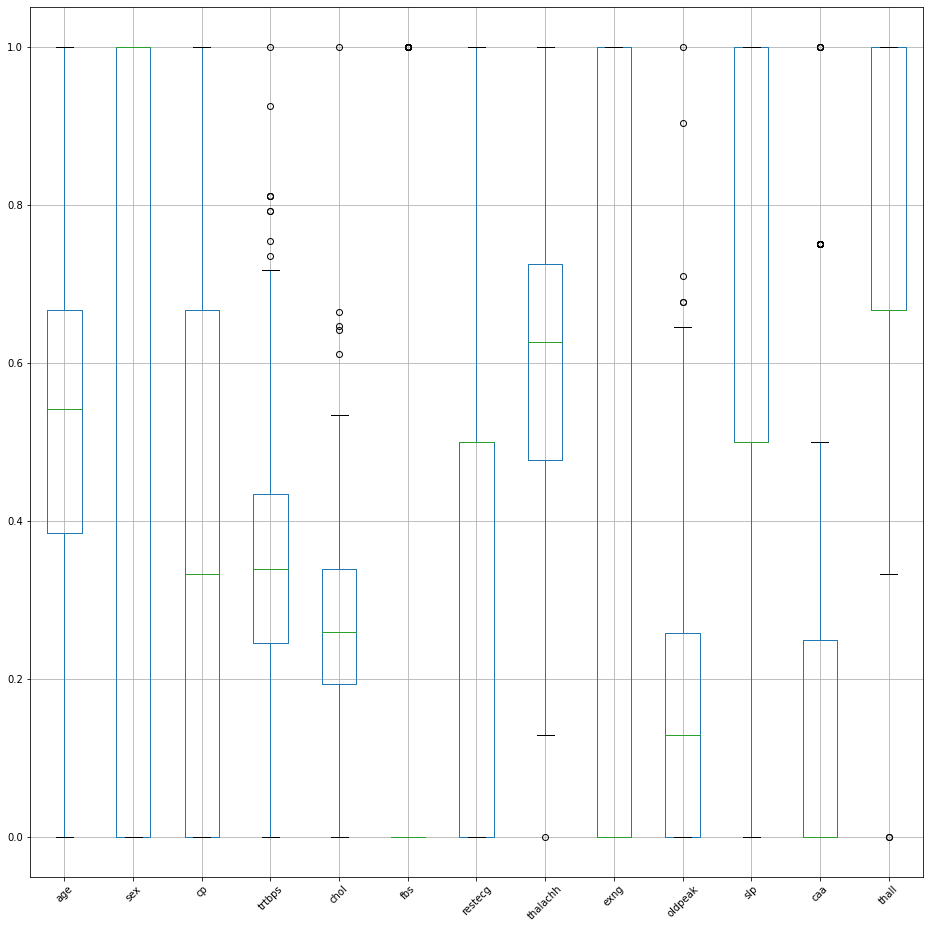

In [14]:
df_minmax.boxplot(rot=45, figsize=(16,16))

Le plot est rééquilibré sauf pour thalachh, caa, chol et trtbps. De plus  on aperçoit des outliers au niveau de ses colonnes.

In [15]:
from sklearn import cluster
kmeans_minmax = cluster.KMeans(n_clusters=2, random_state=42)
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=2, random_state=42)

In [16]:
kmeans_minmax.labels_


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [17]:
df['cl2_minmax' ]= kmeans_minmax.labels_
df.sort_values('cl2_minmax')


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  \
output                                                                      
1        63    1   3     145   233    1        0       150     0      2.3   
1        44    0   2     118   242    0        1       149     0      0.3   
1        60    0   3     150   240    0        1       171     0      0.9   
1        44    1   2     120   226    0        1       169     0      0.0   
1        42    1   2     130   180    0        1       150     0      0.0   
...     ...  ...  ..     ...   ...  ...      ...       ...   ...      ...   
0        56    1   0     125   249    1        0       144     1      1.2   
0        61    0   0     145   307    0        0       146     1      1.0   
0        61    1   0     120   260    0        1       140     1      3.6   
0        56    1   0     132   184    0        0       105     1      2.1   
0        59    1   0     110   239    0        0       142     1      1.2   

        slp  caa  thall  cl2_minmax  
output                               
1         0    0      1           0  
1         1    1      2           0  
1         2    0      2           0  
1         2    0      2           0  
1         2    0      2           0  
...     ...  ...    ...         ...  
0         1    1      2           1  
0         1    0      3           1  
0         1    1      3           1  
0         1    1      1           1  
0         1    1      3           1  

[303 rows x 14 columns]

On s'aperçoit que l'output ayant la valeur 1 coïncide avec cl2_minmax à 0, et inversement. Nous allons vérifier le pourcentage avec un groupby. 

In [18]:
pd.crosstab(df.index, df.cl2_minmax)

cl2_minmax    0   1
row_0              
0            62  76
1           142  23

Le résultat est coréant on trouve 142 personnes potentiellement à risque pour une prédiction de 0.
Nous pouvons vérifier si le nombre de cluster choisit était le bon en y définssant la valeur d'inertie.

In [19]:
kmeans_minmax.inertia_

252.56760913316816

In [20]:
from sklearn import cluster
kmeans_orig = cluster.KMeans(n_clusters=2, random_state=42)
kmeans_orig.fit(df)
kmeans_orig.inertia_

605215.4311714554

*** For n_clusters = 2, inertia is 252.56760913316813 ***

*** For n_clusters = 3, inertia is 204.22198963621273 ***

*** For n_clusters = 4, inertia is 182.6615310022632 ***

*** For n_clusters = 5, inertia is 166.18176596144738 ***

*** For n_clusters = 6, inertia is 155.1672354430583 ***

*** For n_clusters = 7, inertia is 144.5032306612459 ***

*** For n_clusters = 8, inertia is 138.98187517390033 ***

*** For n_clusters = 9, inertia is 131.76142433824108 ***

*** For n_clusters = 10, inertia is 126.77341760735138 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

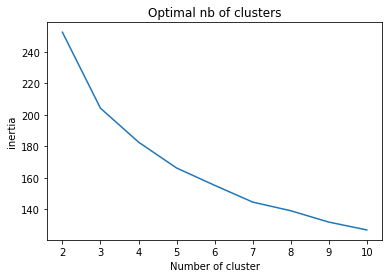

In [21]:
scores = {}
for k in range(2, 11):
    km = cluster.KMeans(n_clusters=k, random_state=42)
    km.fit(df_minmax)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

*** For n_clusters=2, The Silhouette Coefficient is 0.25177965944683706 ***

*** For n_clusters=3, The Silhouette Coefficient is 0.25851690934158633 ***

*** For n_clusters=4, The Silhouette Coefficient is 0.2665594348976237 ***

*** For n_clusters=5, The Silhouette Coefficient is 0.29025125663717705 ***

*** For n_clusters=6, The Silhouette Coefficient is 0.23276333404963567 ***

*** For n_clusters=7, The Silhouette Coefficient is 0.2520122393177844 ***

*** For n_clusters=8, The Silhouette Coefficient is 0.22282211925161033 ***

*** For n_clusters=9, The Silhouette Coefficient is 0.21753182505634822 ***

*** For n_clusters=10, The Silhouette Coefficient is 0.19763006366919272 ***

[0.25177965944683706, 0.25851690934158633, 0.2665594348976237, 0.29025125663717705, 0.23276333404963567, 0.2520122393177844, 0.22282211925161033, 0.21753182505634822, 0.19763006366919272]


Text(0.5, 1.0, 'Optimal nb of clusters')

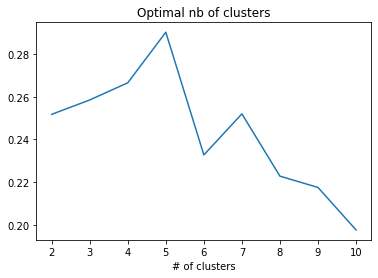

In [22]:
from sklearn import metrics

# Utilisation de la métrique "silhouette"
# Faire varier le nombre de clusters de 2 à 10
scores = []
for k in range(2, 11):
    km = cluster.KMeans(n_clusters = k, random_state = 42)
    km.fit(df_minmax)
    score = metrics.silhouette_score(df_minmax, km.labels_)
    scores.append(score)
    print(f'*** For n_clusters={k}, The Silhouette Coefficient is {score} ***\n')

print(scores)
# S :
# [0.46125628440580635, 0.40294238189905895, 0.41627447069733386, 0.3900272705972848, 0.3228464903008829, 0.3473776041463943, 0.3412276622157032, 0.25028718369271796, 0.22147311807421863]

# Graphique
plt.figure()
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(range(2, 11, 1), scores)
plt.title("Optimal nb of clusters")

Arbre de décision


In [23]:
#On rechrge notre donnée à l'origine 
df = pd.read_csv("./heart.csv")
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [24]:
df.output.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

On affiche le taux de personne étant potenteillemnt à risque ou non.

In [25]:
X = df.drop('output', 1)
y = df['output']
#On définit nos variable pour lancer un entrainement sur une partie de la donnée

/tmp/ipykernel_153714/541276490.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('output', 1)


In [26]:
from sklearn.model_selection import train_test_split
# Répartition de potentiellement à risque  à travers les deux échantillons `train` et `test`
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X, y,)

In [27]:
y_train_sf.value_counts(normalize=True)

1    0.563877
0    0.436123
Name: output, dtype: float64

On retouvre le meme pourcentage ce qui encouragant.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [29]:
y_train.value_counts(normalize=True)

1    0.546256
0    0.453744
Name: output, dtype: float64

Avec une stratification le pourcentage est beaucoup plus proche de la réalité.

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [31]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

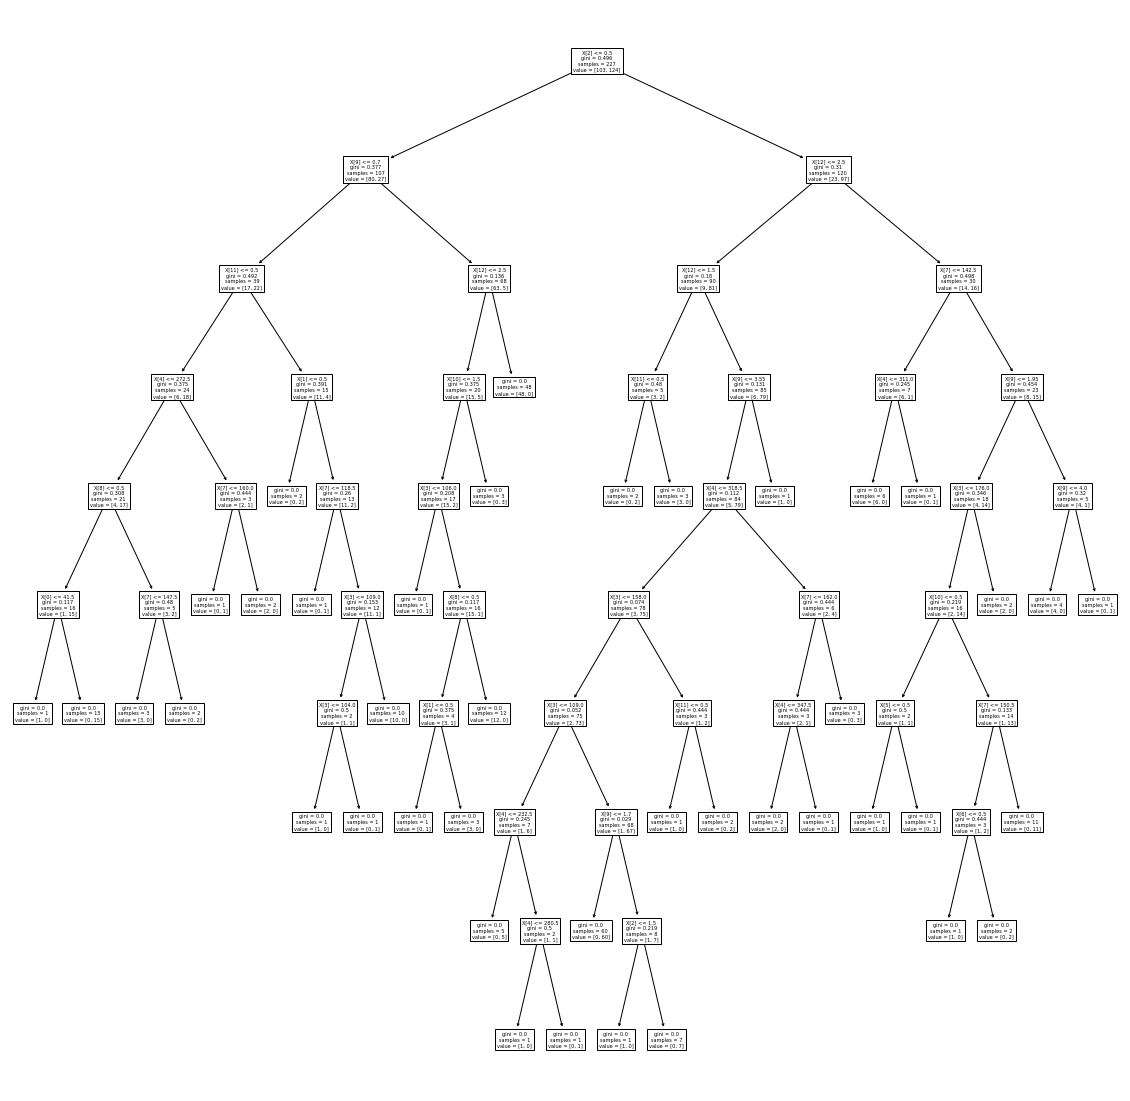

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree_titanic = plot_tree(tree)

L'arbre est lisible et peu profond. On peut voir à optimiser la profondeur de l'arbre en recherchant le meilleur score.

In [34]:
scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)
scores

[0.6710526315789473,
 0.7368421052631579,
 0.7368421052631579,
 0.6973684210526315,
 0.7105263157894737,
 0.7236842105263158,
 0.6842105263157895,
 0.7236842105263158]

In [35]:
#Le gridsearch notre meilleur allié
from sklearn.model_selection import GridSearchCV
param = [{"max_depth" : list(range(2, 10))}]
grid =  GridSearchCV(DecisionTreeClassifier(), param, cv = 10, n_jobs = -1)
grid = grid.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - grid.best_score_, grid.best_params_))


Meilleur score = 0.197628, Meilleur paramètre = {'max_depth': 3}


On applique le meilleur paramètre à notre nouvel arbre

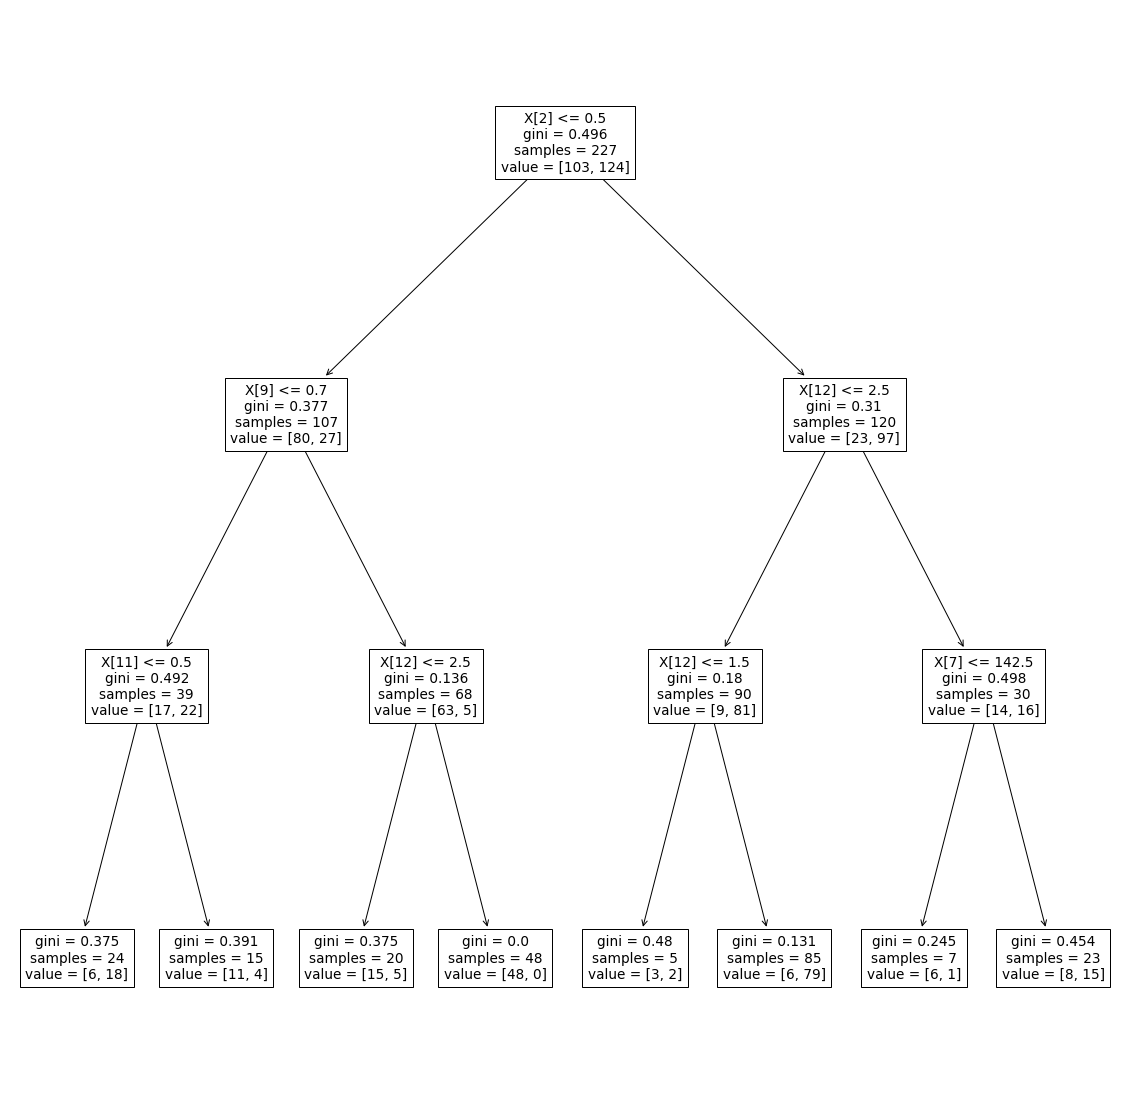

In [36]:
tree=DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (20, 20))
tree_titanic = plot_tree(tree)

On peut en déduire les règles

In [37]:
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- cp <= 0.50
|   |--- oldpeak <= 0.70
|   |   |--- caa <= 0.50
|   |   |   |--- class: 1
|   |   |--- caa >  0.50
|   |   |   |--- class: 0
|   |--- oldpeak >  0.70
|   |   |--- thall <= 2.50
|   |   |   |--- class: 0
|   |   |--- thall >  2.50
|   |   |   |--- class: 0
|--- cp >  0.50
|   |--- thall <= 2.50
|   |   |--- thall <= 1.50
|   |   |   |--- class: 0
|   |   |--- thall >  1.50
|   |   |   |--- class: 1
|   |--- thall >  2.50
|   |   |--- thalachh <= 142.50
|   |   |   |--- class: 0
|   |   |--- thalachh >  142.50
|   |   |   |--- class: 1



Random forest

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [40]:
#On lance notre entrainement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [41]:
#On le fait apprendre
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [43]:
#Notre patrice de confusion
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat


array([[19,  9],
       [ 1, 32]])

In [44]:
(1 - metrics.accuracy_score(y_test, y_pred)) * 100

16.393442622950815

In [45]:
(1 - rf.score(X_test, y_test)) * 100

16.393442622950815

Les scores concordent

Partie tuning
On va définir sur quel paramètre varié pour obtenir le meilleur résultat.

In [46]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [47]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
n_estimators

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  77,  82,  87,  92,  97, 102, 107, 112, 117, 122, 127,
       132, 137, 142, 147, 153, 158, 163, 168, 173, 178, 183, 188, 193,
       198, 203, 208, 213, 218, 223, 229, 234, 239, 244, 249, 254, 259,
       264, 269, 274, 279, 284, 289, 294, 300])

In [48]:
err_default = 9.99
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 27.869


Improvement of -17.88%.


Results : n_estimators = 6 => err_test = 27.869


Improvement of -17.88%.


Results : n_estimators = 11 => err_test = 21.311


Improvement of -11.32%.


Results : n_estimators = 16 => err_test = 21.311


Improvement of -11.32%.


Results : n_estimators = 21 => err_test = 22.951


Improvement of -12.96%.


Results : n_estimators = 26 => err_test = 22.951


Improvement of -12.96%.


Results : n_estimators = 31 => err_test = 21.311


Improvement of -11.32%.


Results : n_estimators = 36 => err_test = 21.311


Improvement of -11.32%.


Results : n_estimators = 41 => err_test = 19.672


Improvement of -9.68%.


Results : n_estimators = 46 => err_test = 19.672


Improvement of -9.68%.


Results : n_estimators = 51 => err_test = 21.311


Improvement of -11.32%.


Results : n_estimators = 56 => err_test = 19.672


Improvement of -9.68%.


Results : n_estimators = 61 => err_test = 19.672


Improvement of -9.68%.


Res

In [49]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred)) * 100, 3)
    errors_test.append(err_test)
    train_pred = rf.predict(X_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(rf.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)
    print(f"\n\nResults : n_estimators = {rf.n_estimators} => acc_oob = {acc_oob}, err_test = {err_test}, err_train = {err_train}\n\n")



Results : n_estimators = 1 => acc_oob = 56.198, err_test = 22.951, err_train = 7.438




Results : n_estimators = 6 => acc_oob = 68.595, err_test = 31.148, err_train = 2.893




Results : n_estimators = 11 => acc_oob = 76.446, err_test = 16.393, err_train = 1.653




Results : n_estimators = 16 => acc_oob = 77.273, err_test = 22.951, err_train = 0.413




Results : n_estimators = 21 => acc_oob = 78.099, err_test = 14.754, err_train = 0.0




/home/nolan/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/nolan/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(




Results : n_estimators = 26 => acc_oob = 78.512, err_test = 26.23, err_train = 0.0




Results : n_estimators = 31 => acc_oob = 79.752, err_test = 21.311, err_train = 0.0




Results : n_estimators = 36 => acc_oob = 80.165, err_test = 14.754, err_train = 0.0




Results : n_estimators = 41 => acc_oob = 82.231, err_test = 18.033, err_train = 0.0




Results : n_estimators = 46 => acc_oob = 78.926, err_test = 18.033, err_train = 0.0




Results : n_estimators = 51 => acc_oob = 84.298, err_test = 14.754, err_train = 0.0




Results : n_estimators = 56 => acc_oob = 78.512, err_test = 18.033, err_train = 0.0




Results : n_estimators = 61 => acc_oob = 80.992, err_test = 14.754, err_train = 0.0




Results : n_estimators = 66 => acc_oob = 81.818, err_test = 19.672, err_train = 0.0




Results : n_estimators = 71 => acc_oob = 79.339, err_test = 19.672, err_train = 0.0




Results : n_estimators = 77 => acc_oob = 80.992, err_test = 18.033, err_train = 0.0




Results : n_estimators = 82 => 

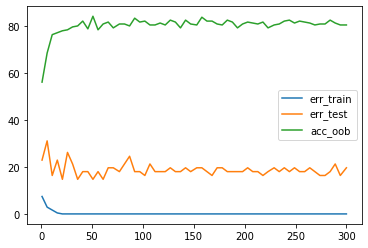

In [50]:
plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [51]:
errors = []
err_default = 9.99
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(X_train, y_train)
    err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 24.59

Improvement of -14.6%




Results : max_depth = 2 => err_test = 21.311

Improvement of -11.321%




Results : max_depth = 3 => err_test = 18.033

Improvement of -8.043000000000001%




Results : max_depth = 4 => err_test = 18.033

Improvement of -8.043000000000001%




Results : max_depth = 5 => err_test = 19.672

Improvement of -9.682%




Results : max_depth = 6 => err_test = 14.754

Improvement of -4.763999999999999%




Results : max_depth = 7 => err_test = 16.393

Improvement of -6.4030000000000005%




Results : max_depth = 8 => err_test = 16.393

Improvement of -6.4030000000000005%




Results : max_depth = 9 => err_test = 18.033

Improvement of -8.043000000000001%




Results : max_depth = 10 => err_test = 16.393

Improvement of -6.4030000000000005%




Results : max_depth = None => err_test = 16.393

Improvement of -6.4030000000000005%




Text(0.5, 0, 'max_depths')

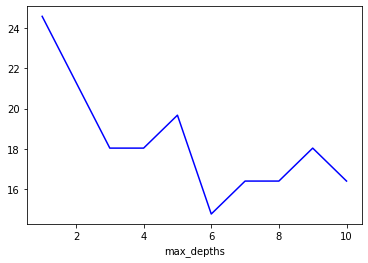

In [52]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

In [53]:
rf = GridSearchCV(RandomForestClassifier(n_estimators=250, random_state = 42),
param, cv=5, n_jobs = -1)
rf
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1, param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}])

In [54]:
param = { "max_features" : list(range(2, 5, 1)), "max_depth" : [2, 3, 4, 5, None] }
param

{'max_features': [2, 3, 4], 'max_depth': [2, 3, 4, 5, None]}

In [57]:
1-rf.score(X_test, y_test)

0.19672131147540983